# Random Sample Imputation ---------------->

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv',usecols =['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [11]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [13]:
X_train , X_test, y_train,y_test = train_test_split(X , y , test_size = 0.2,random_state = 2)

In [19]:
X_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [21]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [25]:
X_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [27]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [35]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [43]:
X_train['Age'].dropna()

30     40.0
10      4.0
873    47.0
182     9.0
876    20.0
       ... 
360    40.0
75     25.0
299    50.0
534    30.0
493    71.0
Name: Age, Length: 564, dtype: float64

In [47]:
# 148 values are missing in 'Age' column ------------------------->

X_train['Age'].isnull().sum()

148

In [57]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([32.  , 17.  , 47.  , 39.  , 24.  , 22.  , 38.  , 25.  ,  7.  ,
       25.  , 33.  , 21.  , 29.  , 19.  , 36.  ,  6.  , 61.  , 24.  ,
       44.  , 49.  , 20.  ,  2.  , 48.  , 19.  , 26.  , 52.  , 36.  ,
       36.5 , 49.  , 32.  , 46.  ,  1.  , 36.  , 29.  , 24.  , 23.  ,
       41.  , 16.  , 51.  , 19.  , 20.  , 22.  , 53.  , 35.  ,  9.  ,
       50.  , 18.  , 42.  , 20.  , 15.  , 31.  ,  4.  , 44.  , 36.  ,
       58.  , 28.  , 57.  , 18.  , 20.  , 32.  , 35.  ,  8.  , 32.  ,
       24.  , 16.  ,  0.75, 34.  , 24.  ,  4.  , 71.  , 27.  , 27.  ,
       60.  , 43.  , 50.  ,  0.83, 43.  , 31.  , 12.  , 61.  , 48.  ,
       28.  , 35.  , 40.  , 27.  , 31.  , 28.  , 37.  , 18.  , 36.  ,
       29.  , 45.  , 30.  , 19.  , 30.  ,  0.75, 61.  , 30.  , 16.  ,
       31.  , 29.  , 70.  , 38.  , 26.  , 58.  , 16.  , 15.  , 21.  ,
       27.  , 16.  , 21.  , 35.  ,  3.  , 17.  , 25.  , 33.  ,  4.  ,
       32.5 , 39.  , 41.  , 31.  , 26.  , 34.  , 24.  , 30.  , 14.  ,
       27.  , 26.  ,

In [73]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

ValueError: cannot set using a list-like indexer with a different length than the value

In [75]:
X_train['Age'].isnull().sum()

148

In [77]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.00
10,4.0,16.7000,4.00
873,47.0,9.0000,47.00
182,9.0,31.3875,9.00
876,20.0,9.8458,20.00
...,...,...,...
534,30.0,8.6625,30.00
584,NaN,8.7125,0.67
493,71.0,49.5042,71.00
527,NaN,221.7792,28.00


C:\Users\Dell\AppData\Local\Temp\ipykernel_18704\2218903946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'] , label ='Original',hist = False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18704\2218903946.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_tra

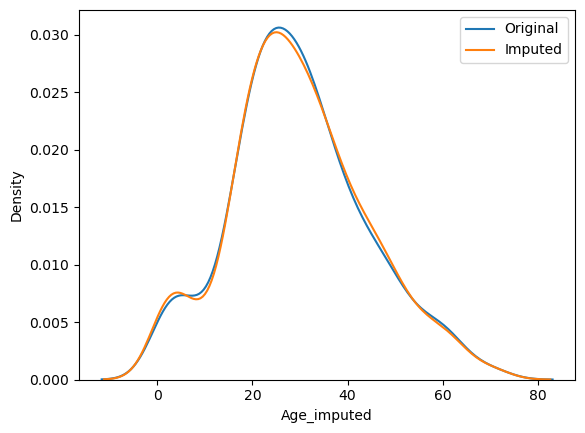

In [91]:
sns.distplot(X_train['Age'] , label ='Original',hist = False)
sns.distplot(X_train['Age_imputed'] , label ='Imputed',hist = False)

plt.legend()
plt.show()

In [107]:
print("Original variable variance: ", X_train['Age'].var())
print("Variance after random imputation: ", X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  206.4440275460659


In [109]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,55.009249
Age,71.512440,204.349513,204.349513
Age_imputed,55.009249,204.349513,206.444028


<Axes: >

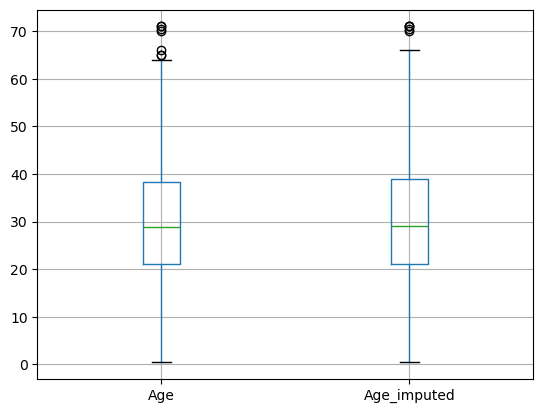

In [111]:
X_train[['Age','Age_imputed']].boxplot()

In [ ]:
# for idx, observation in X_train.iterrows():
#     sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))
#     X_train.at[idx, 'Age_imputed'] = sampled_value.values[0]


In [177]:
data = pd.read_csv('house-train.csv', usecols =['GarageQual' , 'FireplaceQu','SalePrice'])

In [179]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [181]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [183]:
X = data
y = data['SalePrice']

In [185]:
X_train, X_test ,y_train,y_test = train_test_split(X, y , test_size =0.2, random_state = 2) 

In [189]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [191]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [199]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]

127     NaN
99      NaN
921     NaN
1179    NaN
1143    NaN
       ... 
434     NaN
942     NaN
1326    NaN
1349    NaN
1219    NaN
Name: GarageQual_imputed, Length: 65, dtype: object

In [201]:
X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

array(['Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'Fa', 'TA'],
      dtype=object)

In [203]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

C:\Users\Dell\AppData\Local\Temp\ipykernel_18704\2263490880.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual

In [217]:
X_train.sample(10)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
75,NaN,TA,91000,TA,NaN
207,Po,TA,141000,TA,Po
1323,NaN,NaN,82500,TA,NaN
785,Gd,TA,161500,TA,Gd
1009,NaN,NaN,102000,TA,NaN
934,Gd,TA,242000,TA,Gd
466,Po,TA,167000,TA,Po
19,NaN,TA,139000,TA,NaN
707,Gd,TA,254000,TA,Gd
740,NaN,TA,132000,TA,NaN


In [219]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values

C:\Users\Dell\AppData\Local\Temp\ipykernel_18704\4179475245.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['Firepla

In [221]:
X_train.sample(20)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1038,TA,NaN,97000,TA,TA
700,Gd,TA,312500,TA,Gd
172,TA,Gd,239000,Gd,TA
524,TA,TA,315750,TA,TA
1093,NaN,TA,146000,TA,Gd
648,TA,TA,155000,TA,TA
766,TA,TA,196500,TA,TA
1063,Gd,TA,110500,TA,Gd
1256,TA,TA,301500,TA,TA
295,NaN,TA,142500,TA,TA


In [223]:
X_train.isnull().mean() * 100

FireplaceQu            47.688356
GarageQual              5.565068
SalePrice               0.000000
GarageQual_imputed      0.000000
FireplaceQu_imputed     0.000000
dtype: float64

In [231]:
# Har Categorical Column me jo sari categories hai unka jo frequency hai wo hm dekh rhe before and after imputation -------------------------------------------->

temp = pd.concat([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train)
],axis = 1)

temp.columns =['Original', 'imputed']

In [233]:
temp

,Original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [241]:
temp2 = pd.concat([
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
],axis = 1)

temp2.columns =['Original', 'imputed']

In [243]:
temp2

,Original,imputed
Gd,0.494272,0.494007
TA,0.412439,0.413527
Fa,0.040917,0.039384
Po,0.027823,0.027397
Ex,0.024550,0.025685


C:\Users\Dell\AppData\Local\Temp\ipykernel_18704\1459766756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist = False,label = category)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18704\1459766756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

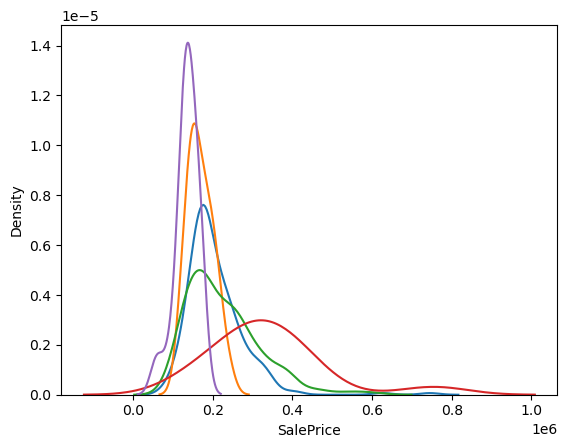

In [245]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist = False,label = category)

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18704\171615101.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist = False,label = category)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18704\171615101.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

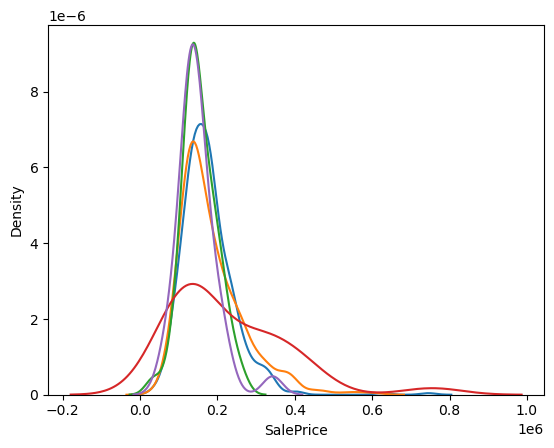

In [247]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist = False,label = category)

plt.show()